In [10]:
import sys
sys.path.append("../")

from pathlib import Path

# Importing classification algorithm abstraction and components to parameterize it.
from CPDShell.Core.algorithms.classification_algorithm import ClassificationAlgorithm
# Importing implementation of SVM classifier for CPD.
from CPDShell.Core.algorithms.ClassificationBasedCPD.classifiers.svm.svm_classifier import SVMClassifier
# Importing quality metric.
from CPDShell.Core.algorithms.ClassificationBasedCPD.quality_metrics.classification.f1 import F1
# Importing test statistic.
from CPDShell.Core.algorithms.ClassificationBasedCPD.test_statistics.threshold_overcome import ThresholdOvercome
# Importing shell of CPD algorithm.
from CPDShell.shell import CPDShell
# Importing generator of dataset.
from CPDShell.generator.generator import ScipyDatasetGenerator
from CPDShell.generator.saver import DatasetSaver

In [11]:
# Path to configuration of dataset that is going to be generated.
path_string = "./configs/test_config_exp.yml"
distributions_name = "exp"

saver = DatasetSaver(Path(), True)
# Generating datatset.
generated = ScipyDatasetGenerator().generate_datasets(Path(path_string), saver)
data, expected_change_points = generated[distributions_name]
print("Expected change points:", expected_change_points)

Expected change points: [200]


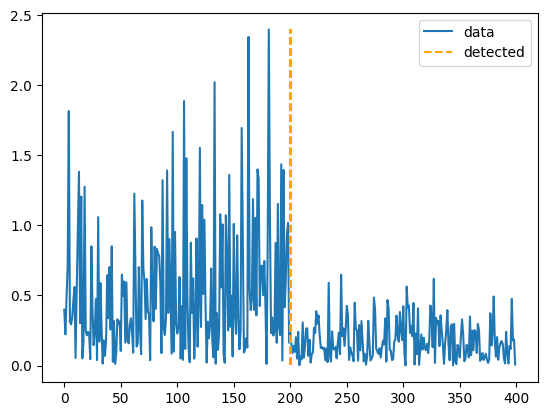

Located change points: (200;201)
Computation time (sec): 0.2


In [12]:
# Constants
# Threshold for statistic to overcome to be change point. Should be less than 1.
THRESHOLD = 0.88
# Size of sample that CPD algorithm considers at a time.
WINDOW_SIZE = 32
# Movement coefficient for calculating number of new elements for consideration each time the window moves forward.
MOVEMENT_COEFF = 0.5
# Indentation from window borders not to consider points close to the borders of the window, because they are always change points.
# Calculated this way: (1 - MOVEMENT_COEFF) / 2 
INDENT_COEFF = 0.25
# Limit of change points to be detected.
CHANGE_POINT_NUMBER = 20

# Creating instance of SVM classifier.
svm_classifier = SVMClassifier()
# Creating instance of quality metric.
quality_metric = F1()
# Creating instance of statistical criterion.
statistic = ThresholdOvercome(THRESHOLD)

# Creating instance of classification based CPD algorithm, parameterized by components mentioned above.
classification_based_cpd = ClassificationAlgorithm(svm_classifier, quality_metric, statistic, INDENT_COEFF)
# Creating shell of CPD algorithm, parameterized by offline data and classification based CPD algorithm.
cpd = CPDShell(data, classification_based_cpd)
# Changing scrubber parameters. Will be reworked soon.
cpd.scrubber.window_length = WINDOW_SIZE
cpd.scrubber.movement_k = MOVEMENT_COEFF
cpd.scenario.change_point_number = CHANGE_POINT_NUMBER

# Running CPD algorithm.
result = cpd.run_cpd()
# Making a plot, visualizing the input time series and the detected change points.
result.visualize(True)
print(result)